### PCA 개요 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target ## iris target 데이터 프레임에 넣어줌
irisDF.head(3)

sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0

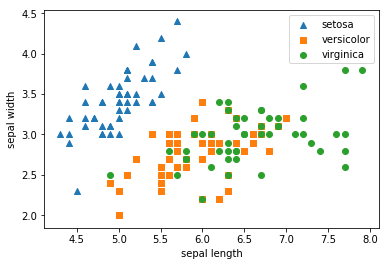

In [18]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length'] ## i번째 타겟의 sepal_length 값 가져오기
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width'] ## i번째 타겟의 sepal_width 값 가져오기
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i]) ## 해당하는 length와 width의 값 그래프에 점 만들기

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()
## 기존의 변수들은 군집화가 잘 되어있지 않음 (versicolor와 virginica가 둘이 섞여 있음)

In [19]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF) ##기본 스케일적용 (정규화)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
##고유벡터를 몇개를 뽑아내야하는지 궁금
##그걸 알기 위해 람다값을 먼저 구해야 함
from sklearn.decomposition import PCA

##주성분분석 람다값이 다 나옴
pca = PCA().fit(iris_scaled) 
np.cumsum(pca.explained_variance_ratio_) ##cumsum: 누적합 
##설명력이 있다고 판단하는 것이 70%정도가 넘어야 하는데
##람다1+람다2했을 때 0.95 (90%가 넘는 설명력을 가짐) 이므로 k=2로 결정

array([0.76740358, 0.95023085, 0.98747608, 0.9958933 , 1.        ])

In [7]:
pca = PCA(n_components=2) ##k=2인 주성분분석

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2'] ##k=2이니까 두개의 군집
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target ##주성분분석한 데이터프레임에 target 추가
irisDF_pca.head(3)

pca_component_1  pca_component_2  target
0        -2.576120         0.474499       0
1        -2.415322        -0.678092       0
2        -2.659333        -0.348282       0

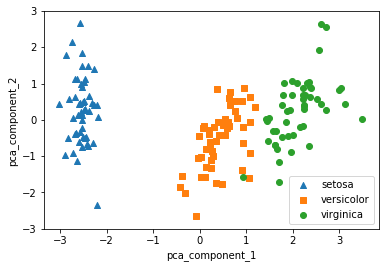

In [9]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

##PCA 변환한게 변동성을 잘 설명하기 때문에 세개가 구분이 잘 되는 것

In [10]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3) ##정확성을 점수화해서 3개의 군집으로 분류해라
print(scores) ##예측 정확성

[0.98039216 0.94117647 0.97916667]


In [16]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 ) #cv=3이 세번 돌렸다는 의미
print(scores_pca) ##주성분 분석 score

[0.98039216 0.96078431 1.        ]


In [ ]:
## 데이터를 줄였음에도 불구하고 원 데이터와 값이 크게 차이나지 않았다 
## 그러므로 데이터를 줄이는 것이 괜찮았다는 결론
## 클러스터링하는데 변수가 너무 많으면 소요시간이 너무 길고 제대로 결과가 나오지 않기 때문
## 따라서 좋은 클러스터링을 위한 변수 조정